**About Dataset**

This dataset contains historical price data for Bitcoin (BTC/USDT) from January 1, 2018, to September 6, 2024. The data was sourced using both the Binance API and Yahoo Finance.
**   **
This dataset includes the following fields for each timeframe**:**

Open time: The timestamp for when the interval began.

Open price: The price of Bitcoin at the beginning of the interval.

High price: The highest price during the interval.

Low price: The lowest price during the interval.

Close price: The price of Bitcoin at the end of the interval.

Volume: The trading volume during the interval.

Close time: The timestamp for when the interval closed.

Additional columns: Include details on the number of trades and taker buy volumes.

**   **

**Importing the libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, mean_squared_error, mean_absolute_error

**Reading a dataset from Kaggle**

In [2]:
data_path = "/kaggle/input/bitcoin-historical-datasets-2018-2024/btc_1h_data_2018_to_2024-09-06.csv"
data = pd.read_csv(data_path)

**Converting Date and Time Data to Numerical Values**

In [3]:
# Convert date and time information to datetime type
data['Open time'] = pd.to_datetime(data['Open time'])
data['Close time'] = pd.to_datetime(data['Close time'])

# Convert date and time information to Unix timestamp
data['Open time'] = data['Open time'].astype(int) / 10**9  # In seconds
data['Close time'] = data['Close time'].astype(int) / 10**9

**Before building the model, we need to identify the dependent and independent variables.**
**   **
We selected the 'Close' price as the dependent variable because it represents the final trading price of a security at the end of the trading day, which is crucial for investment decisions and trend analysis."

In [4]:
X = data.drop("Close", axis=1)   # Independent variable
y = data["Close"]    # Dependent variable

**Scaling or normalizing the data**

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
data.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1.514765e+09,13715.65,13715.65,13400.01,13529.01,443.356199,1.514768e+09,5.993910e+06,5228,228.521921,3.090541e+06,0
1,1.514768e+09,13528.99,13595.89,13155.38,13203.06,383.697006,1.514772e+09,5.154522e+06,4534,180.840403,2.430449e+06,0
2,1.514772e+09,13203.00,13418.43,13200.00,13330.18,429.064572,1.514776e+09,5.710192e+06,4887,192.237935,2.558505e+06,0
3,1.514776e+09,13330.26,13611.27,13290.00,13410.03,420.087030,1.514779e+09,5.657448e+06,4789,137.918407,1.858041e+06,0
4,1.514779e+09,13434.98,13623.29,13322.15,13601.01,340.807329,1.514783e+09,4.588047e+06,4563,172.957635,2.328058e+06,0


**Splitting the dataset into train and test sets (70% training, 30% testing)**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

**Defining algorithms**

In [7]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
}

**Applying the DBSCAN and K-Means algorithm**

In [8]:
# Apply K-Means algorithm
kmeans = KMeans(n_clusters=4, random_state=42)  # Set the number of clusters
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_centroids = kmeans.cluster_centers_

# Apply DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Visualizing the clusters**

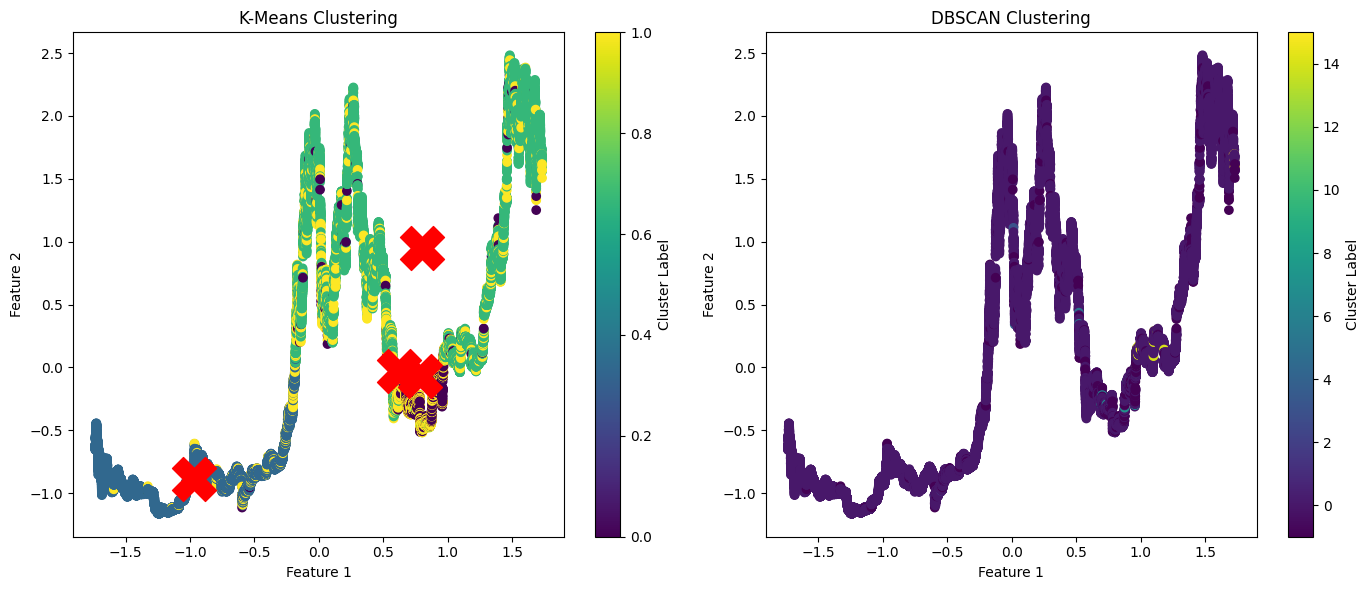

In [9]:
# Visualize K-Means results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], s=1000, c='red', marker='X')  # Mark cluster centroids
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')  

# Visualize DBSCAN results
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')  

plt.tight_layout()
plt.show()

**Create a variable to store the performance of each model**

In [10]:
best_score = float('-inf')
best_model = None

**Train and evaluate each model**
**   **
After training and testing, **Linear Regression** has proven to be the best-performing algorithm. Since the model's performance is already very high, there is no need for further optimization or performance enhancement.

In [11]:
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on the test set
    score = model.score(X_test, y_test)  # Calculate model performance
    print(f"{name}: R^2 Score = {score}")

    # If the current model's score is better than the best score so far,
    # update the best model to the current one
    if score > best_score:
        best_score = score
        best_model = model

Linear Regression: R^2 Score = 0.9999728865440416
Decision Tree: R^2 Score = 0.9999347155640339


**Correlation Matrix**

A correlation matrix shows how different variables are related to each other. In Bitcoin analysis, it helps us see which factors, like price and volume, move together or in opposite directions. This is useful for understanding patterns and building better prediction models.

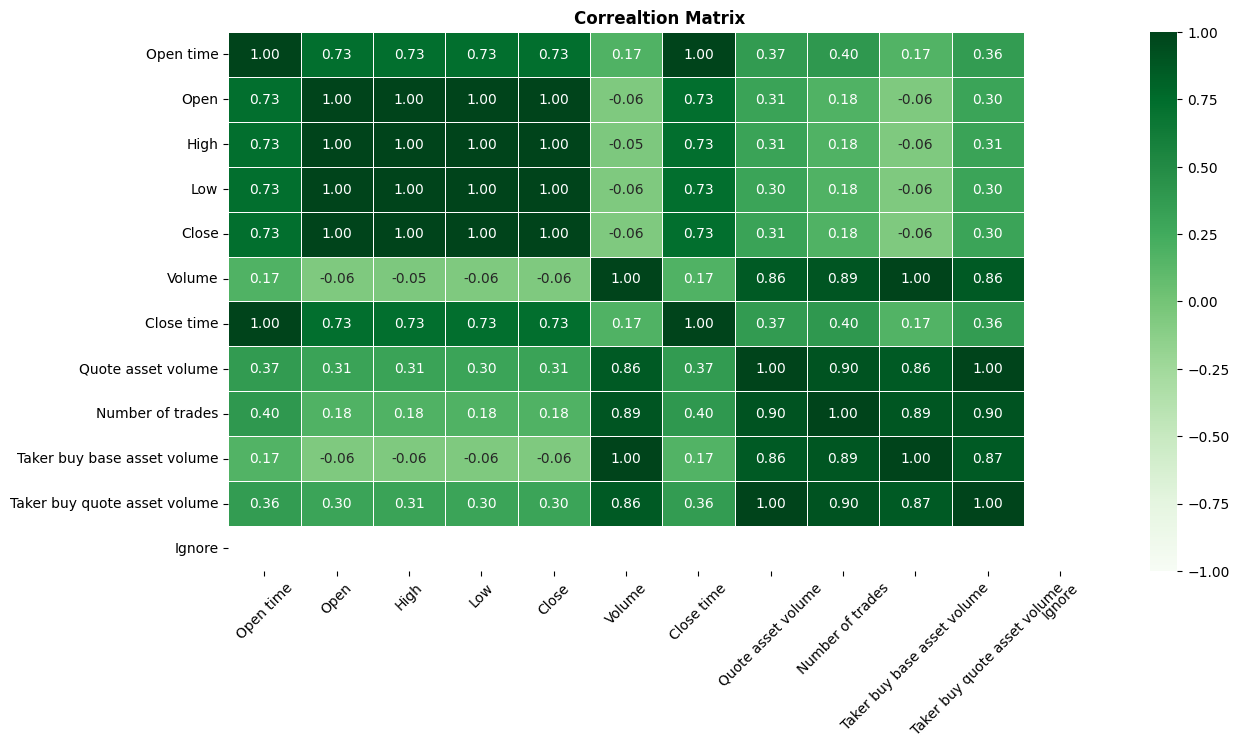

In [12]:
correlation_matrix = data.corr()
plt.figure(figsize=(14,7))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f', vmin=-1, vmax=1,linewidth=0.5)
plt.title("Correaltion Matrix ", loc="center", fontweight='bold')
plt.xticks(rotation=45)
plt.show()

**Top 10 Highest Bitcoin Opening Prices and Times (2018-2024):**



In [19]:
print("Top 10 Highest Bitcoin Opening Prices and Times (2018-2024):")
data['Open time'] = pd.to_datetime(data['Open time'], unit='s')
top_10 = data[['High', 'Open time']].nlargest(10, 'High') 
top_10.style.background_gradient(cmap='Greens')

Top 10 Highest Bitcoin Opening Prices and Times (2018-2024):


,High,Open time
54221,73777.000000,2024-03-14 07:00:00
54218,73658.000000,2024-03-14 04:00:00
54198,73650.250000,2024-03-13 08:00:00
54199,73607.800000,2024-03-13 09:00:00
54220,73600.000000,2024-03-14 06:00:00
54222,73528.110000,2024-03-14 08:00:00
54223,73500.000000,2024-03-14 09:00:00
54201,73481.310000,2024-03-13 11:00:00
54210,73410.220000,2024-03-13 20:00:00
54209,73394.190000,2024-03-13 19:00:00


**Model Evaluation - Loss Calculation for Regression**

Mean Squared Error (MSE) measures the average of the squared differences between predicted and actual values, giving more weight to larger errors. 

Mean Absolute Error (MAE) calculates the average of the absolute differences, providing a more straightforward measure of error without emphasizing large deviations.

In [14]:
mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Remove the negative sign MSE and MAE.
mse_scores = -mse_scores
mae_scores = -mae_scores

print(f"Mean Squared Error: {mse_scores.mean()} ± {mse_scores.std()}")
print(f"Mean Absolute Error: {mae_scores.mean()} ± {mae_scores.std()}")

Mean Squared Error: 464479.08309947734 ± 680128.8371010602
Mean Absolute Error: 276.99944463045745 ± 255.17496244092422
